In [2]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import psutil
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb

In [28]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/func_1'

In [6]:
brain_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/func_1/motcorr/motcorr_green.nii'
brain = bbb.load_numpy_brain(brain_file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 47.51 sec


In [7]:
brain.shape

(256, 256, 17, 5064)

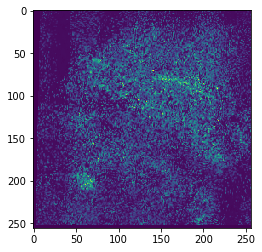

In [22]:
plt.imshow(brain[:,:,10,0])
plt.show()

In [71]:
x=73
y=205
z=7

In [76]:
np.shape(timestamps)

(5064, 17)

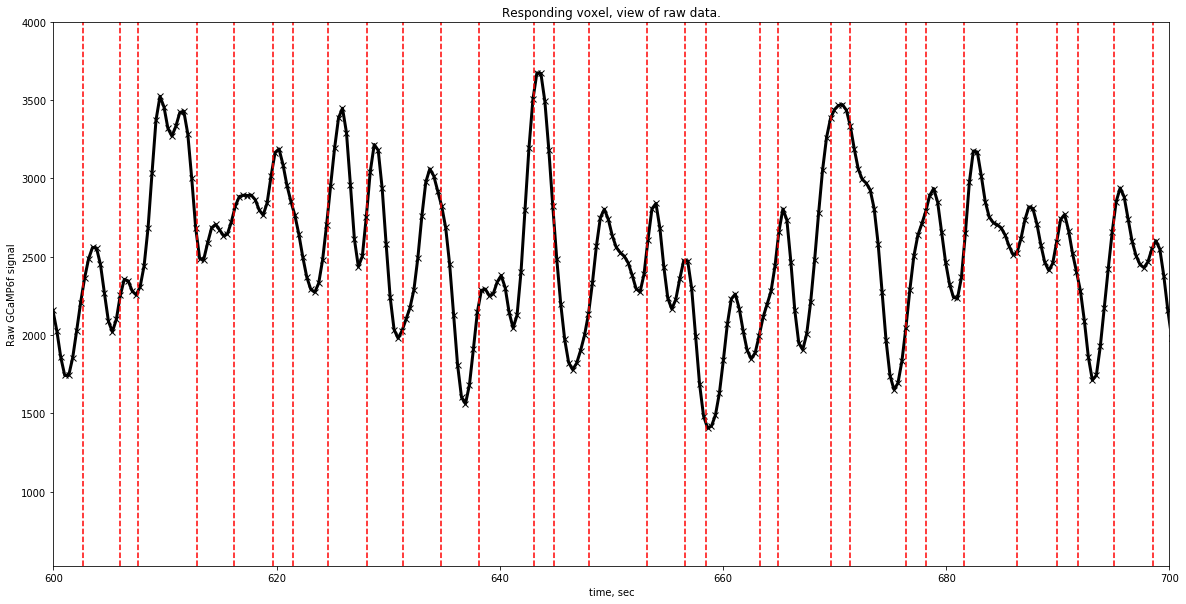

In [98]:
plt.figure(figsize=(20,10))
plt.plot(timestamps[:,z]/1000, scipy.ndimage.filters.gaussian_filter(brain[x,y,z,:],sigma=2),color='k',linewidth=3,marker='x')
for time in unique_stimuli[1]['times']:
    plt.axvline(time/1000,color='r',linestyle='--')
plt.xlim(600,700)
plt.xlabel('time, sec')
plt.ylabel('Raw GCaMP6f signal')
plt.title('Responding voxel, view of raw data.')
plt.show()

In [29]:
timestamps = bbb.load_timestamps(os.path.join(directory, 'imaging'))
unique_stimuli = bbb.get_stimuli(os.path.join(directory, 'visual'))


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 29.98 ms
loading photodiode data... done
loading visual stimuli data... done
Successfully parsed all stimuli from photodiode output.


In [135]:
unique_stimuli[0]

{'angle': 0,
 'color': 1,
 'name': 'SineGrating',
 'period': 40,
 'rate': 100,
 'times': [137495.9,
  140798.7,
  142632.5,
  147838.6,
  149629.0,
  154904.6,
  156695.0,
  160058.5,
  163491.5,
  166829.0,
  171600.4,
  175024.8,
  176832.5,
  181943.0,
  183689.9,
  186810.2,
  191720.7,
  193276.4,
  198378.2,
  200212.0,
  203688.5,
  208538.3,
  211980.0,
  213483.6,
  218402.8,
  219923.8,
  223565.5,
  227146.3,
  232430.5,
  234003.8,
  239122.9,
  240626.5,
  245658.7,
  247388.2,
  252368.3,
  255740.6,
  259356.1,
  262641.4,
  264431.8,
  269568.4,
  272949.2,
  274504.9,
  277946.8,
  283039.8,
  284847.5,
  288289.3,
  293391.1,
  295207.6,
  298553.8,
  303699.0,
  306853.9,
  308461.7,
  311616.6,
  316770.5,
  318448.0,
  321785.5,
  326974.1,
  328738.4,
  333492.5,
  335187.4,
  338690.0,
  343800.5,
  347068.4,
  350145.0,
  353560.7,
  356967.7,
  360348.5,
  362026.0,
  367119.1,
  370717.2,
  374219.8,
  375775.6,
  379217.4,
  384214.7,
  386005.2,
  570903.0,


In [36]:
useful_frames = bbb.calc_event_triggered_delays(brain, unique_stimuli[1]['times'], timestamps)

1 of 300. 2 of 300. 3 of 300. 4 of 300. 5 of 300. 6 of 300. 7 of 300. 8 of 300. 9 of 300. 10 of 300. 11 of 300. 12 of 300. 13 of 300. 14 of 300. 15 of 300. 16 of 300. 17 of 300. 18 of 300. 19 of 300. 20 of 300. 21 of 300. 22 of 300. 23 of 300. 24 of 300. 25 of 300. 26 of 300. 27 of 300. 28 of 300. 29 of 300. 30 of 300. 31 of 300. 32 of 300. 33 of 300. 34 of 300. 35 of 300. 36 of 300. 37 of 300. 38 of 300. 39 of 300. 40 of 300. 41 of 300. 42 of 300. 43 of 300. 44 of 300. 45 of 300. 46 of 300. 47 of 300. 48 of 300. 49 of 300. 50 of 300. 51 of 300. 52 of 300. 53 of 300. 54 of 300. 55 of 300. 56 of 300. 57 of 300. 58 of 300. 59 of 300. 60 of 300. 61 of 300. 62 of 300. 63 of 300. 64 of 300. 65 of 300. 66 of 300. 67 of 300. 68 of 300. 69 of 300. 70 of 300. 71 of 300. 72 of 300. 73 of 300. 74 of 300. 75 of 300. 76 of 300. 77 of 300. 78 of 300. 79 of 300. 80 of 300. 81 of 300. 82 of 300. 83 of 300. 84 of 300. 85 of 300. 86 of 300. 87 of 300. 88 of 300. 89 of 300. 90 of 300. 91 of 300. 92 of 30

In [137]:
useful_frames = bbb.calc_event_triggered_delays(brain, unique_stimuli[1]['times'], timestamps)

voxel_slices = []
delays = []

for frame in useful_frames:
    if frame['slice'] == z:

        voxel_slice = brain[:,:,z,frame['frame']]
        voxel_slices.append(voxel_slice)

        delay = frame['delay']
        delays.append(delay)
        
means = slice_moving_avg(voxel_slices, delays)
means_btf = np.asarray(means)

1 of 300. 2 of 300. 3 of 300. 4 of 300. 5 of 300. 6 of 300. 7 of 300. 8 of 300. 9 of 300. 10 of 300. 11 of 300. 12 of 300. 13 of 300. 14 of 300. 15 of 300. 16 of 300. 17 of 300. 18 of 300. 19 of 300. 20 of 300. 21 of 300. 22 of 300. 23 of 300. 24 of 300. 25 of 300. 26 of 300. 27 of 300. 28 of 300. 29 of 300. 30 of 300. 31 of 300. 32 of 300. 33 of 300. 34 of 300. 35 of 300. 36 of 300. 37 of 300. 38 of 300. 39 of 300. 40 of 300. 41 of 300. 42 of 300. 43 of 300. 44 of 300. 45 of 300. 46 of 300. 47 of 300. 48 of 300. 49 of 300. 50 of 300. 51 of 300. 52 of 300. 53 of 300. 54 of 300. 55 of 300. 56 of 300. 57 of 300. 58 of 300. 59 of 300. 60 of 300. 61 of 300. 62 of 300. 63 of 300. 64 of 300. 65 of 300. 66 of 300. 67 of 300. 68 of 300. 69 of 300. 70 of 300. 71 of 300. 72 of 300. 73 of 300. 74 of 300. 75 of 300. 76 of 300. 77 of 300. 78 of 300. 79 of 300. 80 of 300. 81 of 300. 82 of 300. 83 of 300. 84 of 300. 85 of 300. 86 of 300. 87 of 300. 88 of 300. 89 of 300. 90 of 300. 91 of 300. 92 of 30

In [132]:
def slice_moving_avg(voxel_slices, delays, start=-2000, stop=2000, step=100):
    
    means = []
    centers = []
    
    for window in range(int((stop - start) / step)):
        
        window_start = start + window * step
        window_end = window_start + step

        above = np.asarray([delay > window_start for delay in delays])
        below = np.asarray([delay < window_end for delay in delays])
        indicies = np.where(above & below)[0]
        
        values = [voxel_slices[index][:,:] for index in indicies]
        mean = np.mean(values, axis = 0)
        means.append(mean)
        
    return means

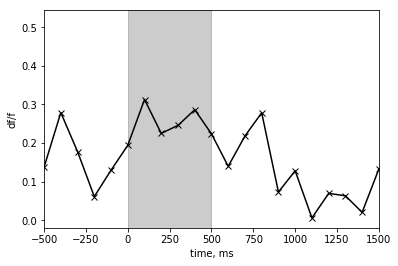

In [134]:
x=73
y=205
z=7
fig, ax = plt.subplots()
ax.plot(np.arange(-2000,2000,100),(means[:,x,y]-2000)/2000,color='k',marker='x')
plt.xlim(-500,1500)
ax.axvspan(0, 500, alpha=0.2, color='k')
plt.xlabel('time, ms')
plt.ylabel('df/f')

plt.show()

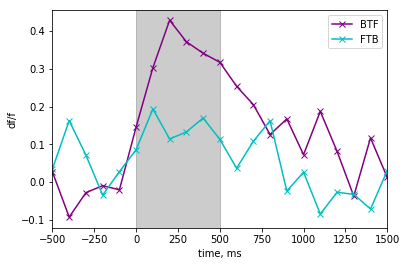

In [159]:

#fig = plt.figure(figsize=(15,15))
x=73
y=205
z=7
baseline = 2200
fig, ax = plt.subplots()

ax.plot(np.arange(-2000,2000,100),(means_btf[:,x,y]-baseline)/baseline,color='purple',marker='x',label='BTF')
ax.plot(np.arange(-2000,2000,100),(means_ftb[:,x,y]-baseline)/baseline,color='c',marker='x',label='FTB')

plt.xlim(-500,1500)
ax.axvspan(0, 500, alpha=0.2, color='k')
plt.xlabel('time, ms')
plt.ylabel('df/f')
plt.legend()
plt.show()